# Seaborn: Violin Plot

Welcome back to another lecture on Seaborn! 

Today our topic of interest would be **[Violin Plot](http://seaborn.pydata.org/generated/seaborn.violinplot.html?highlight=violinplot#seaborn.violinplot<br/>)**, which pretty much does the job similar to our previously discussed **Box Plot** with it's own advantages and disadvantages. Let us at first try to understand what makes **Violin plot** shine out in Seaborn series of plots.

Sometimes just the **Central Tendency** isn't enough to understand a dataset, because it gets difficult to infer, if most of the values are clustered around the *median*, or are they clustered around the *minimum* and *maximum* peaks with actually nothing in the middle. Indeed we may use a **Box plot**, but then, even those don't specifically indicate variations in a *multi-modal distribution* (those with *multiple peaks*). This is where Seaborn **Violin plot** comes in handy as a *hybrid* visualization plot, combining advantages of a **Box plot** and a **KDE (Kernel Densiy Plot)**.

- Violinplots allow to visualize the distribution of a numeric variable for one or several groups. It is really close from a boxplot, but allows a deeper understanding of the density. 

- Violins are particularly adapted when the amount of data is huge and showing individual observations gets impossible. Seaborn is particularly adapted to realize them through its violin function.

- Violinplots are a really convenient way to show the data and would probably deserve more attention compared to boxplot that can sometimes hide features of the data.

In terms of **Summary statistics**, a **Violin Plot** pretty much presents stats similar to that of a **Box plot**. Let us quickly import our *dependancies* and then look into what a **Violin plot** holds in stock for us:

>**Note:**  backward slash **`\`** is used to write code in next line.

In [29]:
# Importing intrinsic libraries:
import numpy as np
import pandas as pd
np.random.seed(101)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid", palette="rainbow")
import warnings
warnings.filterwarnings("ignore")

# Let us also get tableau colors we defined earlier:
tableau_20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
         (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
         (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
         (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
         (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

# Scaling above RGB values to [0, 1] range, which is Matplotlib acceptable format:
for i in range(len(tableau_20)):
    r, g, b = tableau_20[i]
    tableau_20[i] = (r / 255., g / 255., b / 255.)

In [30]:
# Loading built-in Tips dataset:

tips = sns.load_dataset("tips")
tips.head(7)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2


<Axes: xlabel='total_bill'>

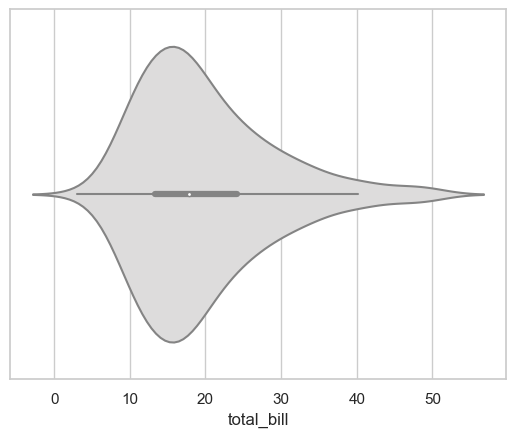

In [31]:
# Plotting basic Violin Plot horizontally:

sns.violinplot(x = tips["total_bill"], palette="coolwarm")

<Axes: ylabel='total_bill'>

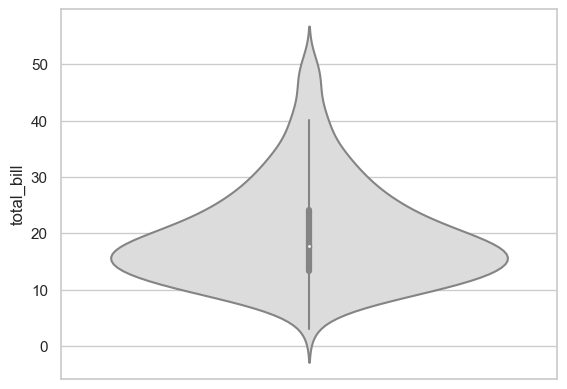

In [32]:
# Plotting basic Violin Plot vertiacally:

sns.violinplot(y = tips["total_bill"], palette="coolwarm")

## Anatomy of Violin Plot

- This **thick bar** that you see at the center (between *values* 12 and 25) represents the **Interquartile Range** (that we discussed in previous lecture).
- The **thin line** just above the thick one represents **95% Confidence Interval**. In Statistics, a **confidence interval** is a type of *interval estimate* that is computed from the observed data. Another term that you might come across is **Confidence Level**, which is just the **frequency** of possible our **Confidence Intervals**, that contain the *true value* of their corresponding parameter.
- And the **tiny white dot** that you notice at the center of our thick line, is actually the **Median**.
- Finally, the **spread** that forms this *Violin shape* is a **Kernel Density Estimation** to show the *distribution shape* of the data. *Wider* sections represent **higher probability** of members from a sample space (observed data) taking on the given. *Skinnier* sections represent a **lower probability**.

So in entirity, it is also one of the best statistical representation offered by Seaborn for visualizing the **Probability Density** of observed data. That doesn't change the fact that **Violin Plot** can be noisier than a **Box Plot** while showing an abstract representation of each distribution of observations.

Let us now get another basic **Violin plot** with few more Violins in it. For this single illustration, instead of our typical usage of built-in dataset, this time I shall use a different dataset that I have also attached in the Resources folder for you to access. I have a particular agenda behind this and shall let you know shortly after I plot it. So let us start by getting this dataset and then previewing it:

In [33]:
# Loading University dataset:
university = pd.read_csv("datasets/University.csv")

# Dataset Preview:
university.head(10)

,university_name,total_students,students_enrolled,gender_dominance,education_level,time
0,Harvard,1582568,12587,Male,High School,Day and Night
1,Oxford,1568291,54682,Female,Graduate,Night
2,Luke,1822565,54808,Female,Graduate,Day and Night
3,Cambridge,785269,24865,Male,Post-Graduate,Day
4,MIT,64154651,258745,Female,High School,Day and Night
5,Xavier's,6611852,5698,Male,High School,Day
6,Cornell,5455131,98547,Male,Graduate,Night
7,Harvard,785280,42530,Female,Post-Graduate,Day
8,Oxford,2534156,22897,Male,Post-Graduate,Day and Night
9,Luke,5425,89,Female,Ph.D,Night


<Axes: xlabel='university_name', ylabel='total_students'>

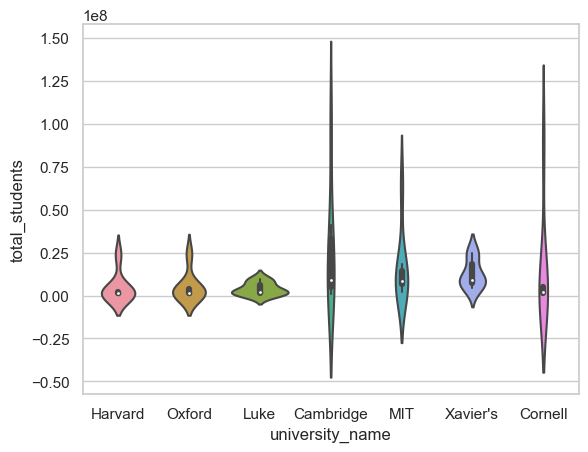

In [34]:
sns.violinplot(x="university_name", y="total_students", data=university)

This plot has *data observations* distributed as per their *density*, overall it's *Probability distribution* is displayed in this plot. If we notice very closely, we shall observe that the **X-axis** has `university_name` properly displayed, BUT the **Y-axis** has values in *scientific notation* as **1e8**, i.e. actually an **Exponential form**. But we also want our values on *Y-Axis* to be normally spread out. Another observation would be that the values are *negative* for `total_students`, but that is okay for us, as anyways we just want to figure out the spread which certainly can be *statistically negative*. Before we get into detailing of our **Violin plot**, let us at first get rid of this *exponential form* of values. And to do so, we would be required to call underlying **Matplotlib Axes** class. Let us now see how to use it:

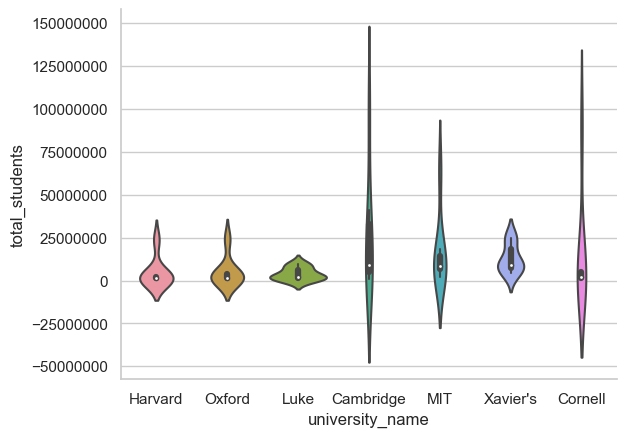

In [35]:
# Removes Scientific notation '1e8'
plt.ticklabel_format(style='plain', axis='y')

# Re-plotting University data:
sns.violinplot(x="university_name", y="total_students", data=university)

# Getting rid of Top and Right spines (just for your 'Styling' revision):
sns.despine()

And here it goes! We got rid of the **exponential form** and have real value range for our dataset. Honestly, this dataset isn't the best one to practice plots because I created it only to reproduce this particular issue of **scientific notation**. I have observed multiple times, beginners as well as professionals getting stuck with this inane problem of conversion; so thought of getting you introduced to a solution for this problem.

Let us now get a full list of *parameters* offered by *Seaborn* along with **Violin Plot**:

**`seaborn.violinplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, bw='scott', cut=2, scale='area', scale_hue=True, gridsize=100, width=0.8, inner='box', split=False, dodge=True, orient=None, linewidth=None, color=None, palette=None, saturation=0.75, ax=None)`**

It seems that we do have a couple of new optional parameters here for customization: 

- First one to catch my attention is **`bw`** parameter which is used to calculate the **Kernel density estimator bandwidth**. Ideally it is expected to be scalar and by default is set to **`scott`**, which we can even alter to **`silverman`** or another **scalar value**, that in turn shall call underlying Matplotlib **`kde.factor`**. This can also be **callable**, and if so, it will take a **GaussianKDE** instance as its only parameter to return a scalar.

- Next is **`cut`** parameter that represents **distance**, in units of **bandwidth size**, to extend the **density** past the *extreme datapoints*. Our last plot had negative values because by default **`cut`** is set to **`2`**, so if we add this parameter as **`cut=0`**, our **violin range** in plot shall be restricted within the range of our **`University`** dataset.

- Next is **`scale`** parameter which represents the method we're going to use for *scaling width of each violin*. By default, it is set to represent **`area`**. But we also have options to replace either with **`count`** to scale by *number of observations* in that bin OR with **`width`** for each violin to have same width.

- Finally, we have **`gridsize`** that helps us compute **Kernel Density Estimate** by assigning *number of points in the discrete grid*.

Let us now try to use all these parameters along with other possible variations. We have already observed KDE and Box Plot previously so conceptually we do not really have anything new here, so let us focus more on visualization in this lecture:

In [36]:
# Loading built-in Tips dataset:
tips = sns.load_dataset("tips")

<Axes: xlabel='day', ylabel='total_bill'>

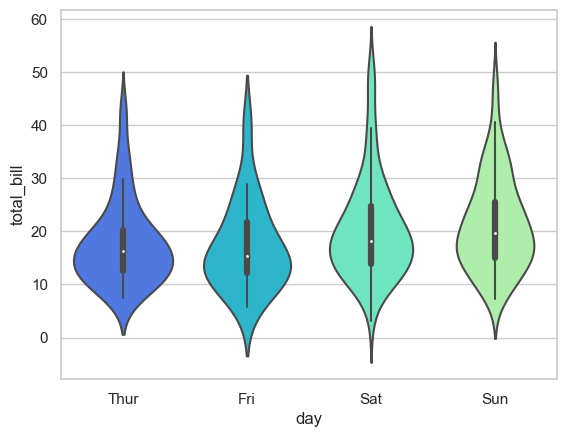

In [37]:
# Draw a vertical violinplot grouped by a categorical variable:
sns.violinplot(x='day', y='total_bill', data=tips)

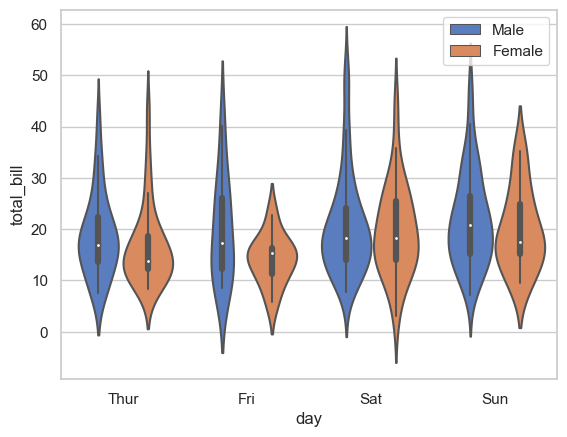

In [38]:
# Draw a violinplot with nested grouping by two categorical variables:
sns.violinplot(x = 'day',y ='total_bill', hue='sex', data=tips, palette='muted')
plt.legend()

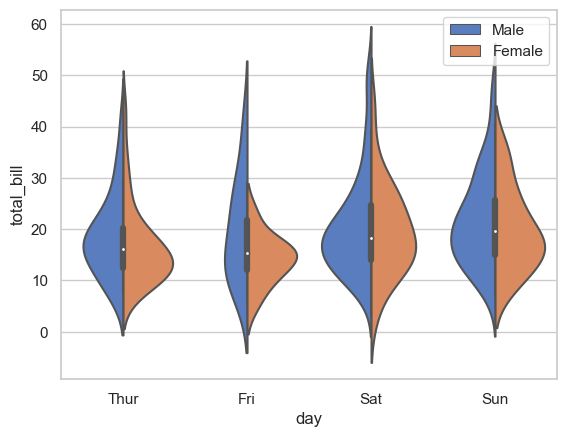

In [39]:
# Draw split violins to compare the across the hue variable:
sns.violinplot(x='day', y='total_bill', hue='sex', data = tips, palette='muted', split=True)
plt.legend()

<Axes: xlabel='day', ylabel='total_bill'>

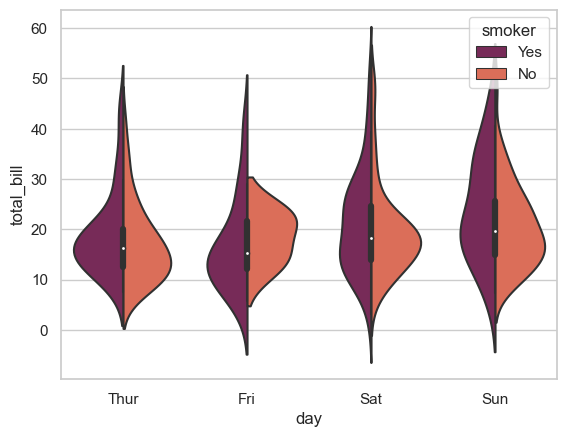

In [40]:
# Making use of 'split' parameter to visualize KDE separately:
sns.violinplot(x="day", y="total_bill", hue="smoker", data=tips, palette="rocket", split=True)

<Axes: xlabel='day', ylabel='total_bill'>

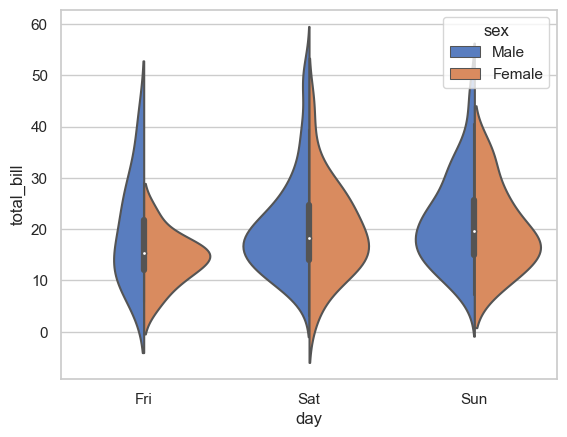

In [41]:
# Control violin order by passing an explicit order:
sns.violinplot(x = 'day', y='total_bill', hue='sex', data=tips, palette='muted', split=True, order=['Fri','Sat','Sun'])

<Axes: xlabel='day', ylabel='total_bill'>

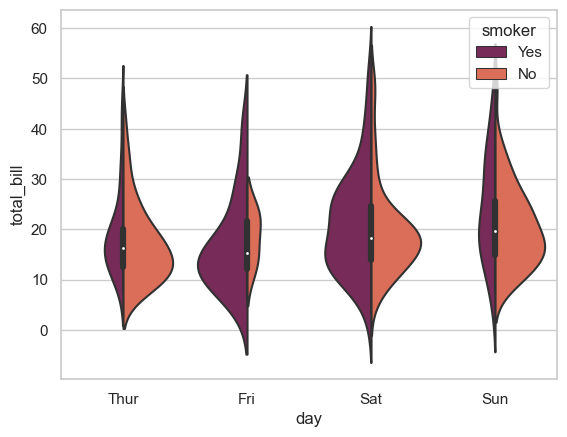

In [42]:
# Let us use 'scale' parameter now:
sns.violinplot(x="day", y="total_bill", hue="smoker", data=tips, palette="rocket", split=True, scale="count")

<Axes: xlabel='day', ylabel='total_bill'>

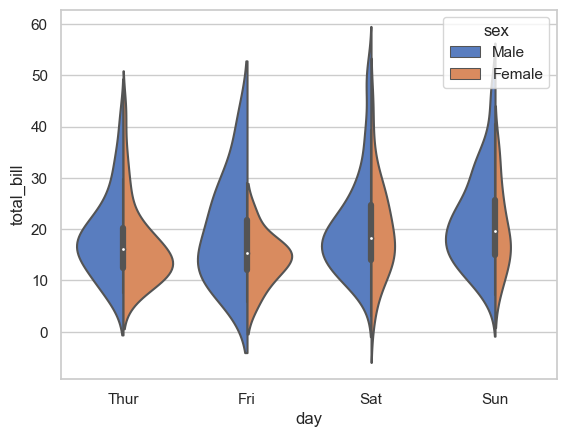

In [43]:
# Scale the violin width by the number of observations in each bin:
sns.violinplot(x ='day', y='total_bill', hue='sex', data = tips, palette='muted', split=True,\
               scale = 'count' )

If you closely observe, you would notice how the spread of *Violin range* get modified as per the individual bin **`count`** that we set as our **`scale`** parameter. Let us add little more variation to this plot:

<Axes: xlabel='day', ylabel='total_bill'>

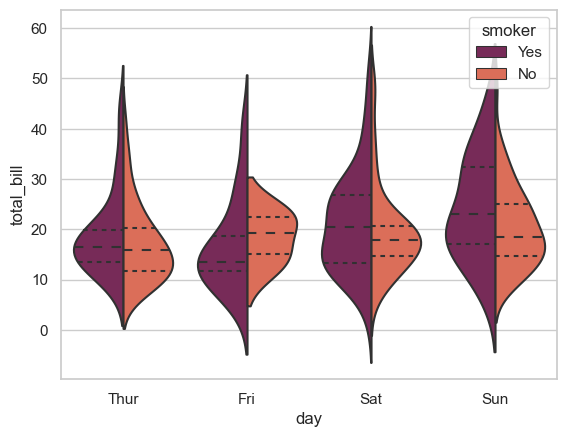

In [44]:
# Let us get our Quartiles visible:
sns.violinplot(x="day", y="total_bill", hue="smoker", data=tips, palette="rocket", split=True, scale="width", inner="quartile")

<Axes: xlabel='day', ylabel='total_bill'>

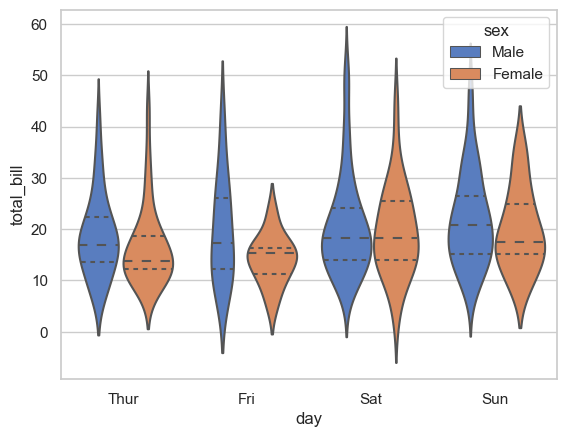

In [45]:
# Draw the quartiles as horizontal lines instead of a mini-box without split :
sns.violinplot(x='day', y='total_bill', hue='sex', data=tips, palette='muted', inner='quartile')

<Axes: xlabel='day', ylabel='total_bill'>

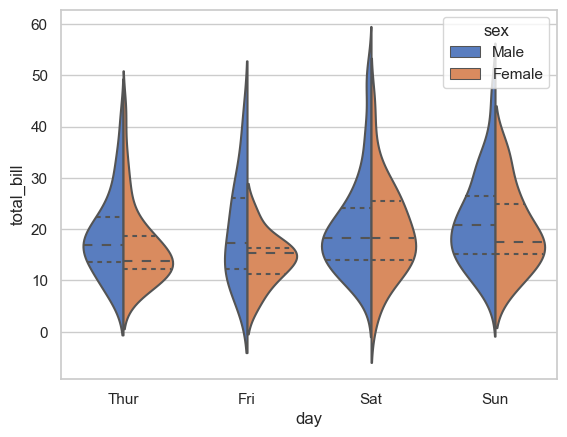

In [46]:
# Draw the quartiles as horizontal lines instead of a mini-box with split:
sns.violinplot(x='day', y='total_bill', hue='sex', data=tips, palette='muted',\
               split=True, inner='quartile')

So addition of just one more parameter, i.e. `inner` helps us represent data points within Violin perceptible in the form of it's Quartiles (as visible in our plot). Alternatively, we may also leave it to *default* as `box`; or alter to `point` and `stick`. Let us try one more:

<Axes: xlabel='day', ylabel='total_bill'>

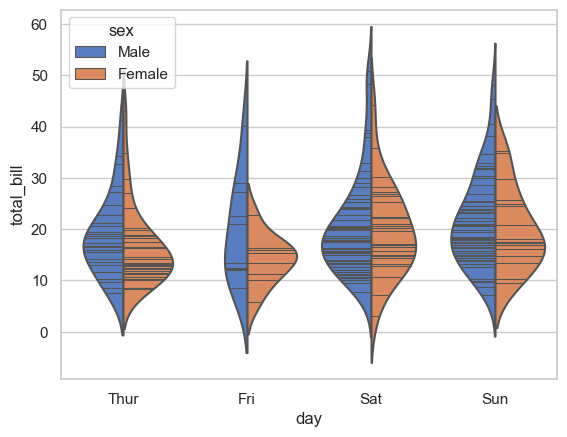

In [47]:
# Show each observation with a stick inside the violin:
sns.violinplot(x='day', y='total_bill', hue='sex', data=tips, palette='muted',\
               split=True, inner='stick')

`scale_hue` helps in computing *scale* as per *count of arrival of Smokers* on each day at the restaurant.

Let us now use a **narrower bandwidth** to reduce the *amount of smoothing* of our violin:

<Axes: xlabel='day', ylabel='total_bill'>

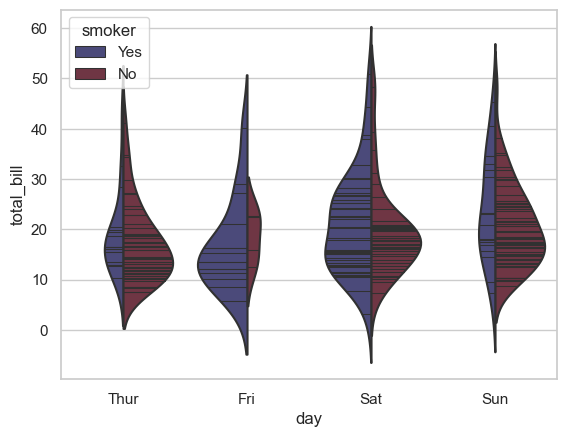

In [48]:
sns.violinplot(x="day", y="total_bill", hue="smoker", data=tips, palette="icefire", split=True, scale="count",
               inner="stick", scale_hue=True)

<Axes: xlabel='day', ylabel='total_bill'>

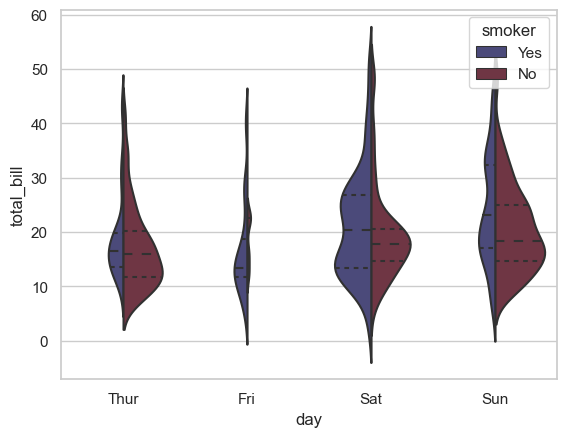

In [49]:
sns.violinplot(x="day", y="total_bill", hue="smoker", data=tips, palette="icefire", split=True, scale="count",
               inner="quartile", scale_hue=False, bw=.35)

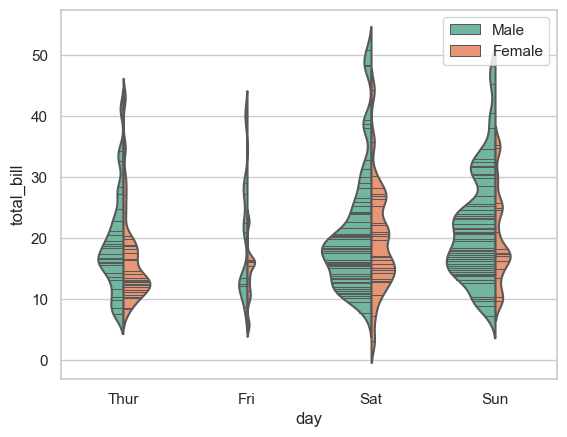

In [50]:
# Use a narrow bandwidth to reduce the amount of smoothing:

sns.violinplot(x="day", y="total_bill", hue="sex",\
                    data=tips, palette="Set2", split=True,\
                   scale="count", inner="stick",\
                   scale_hue=False, bw=.2)
plt.legend()

<Axes: xlabel='orbital_period', ylabel='method'>

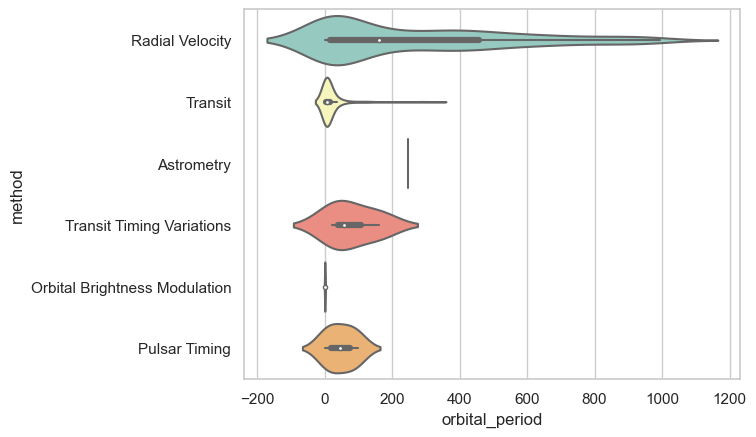

In [51]:
# Draw horizontal violins:
planets_data = sns.load_dataset("planets")

sns.violinplot(x="orbital_period", y="method",\
                   data=planets_data[planets_data.orbital_period < 1000],\
                  scale="width", palette="Set3")

<Axes: xlabel='orbital_period', ylabel='method'>

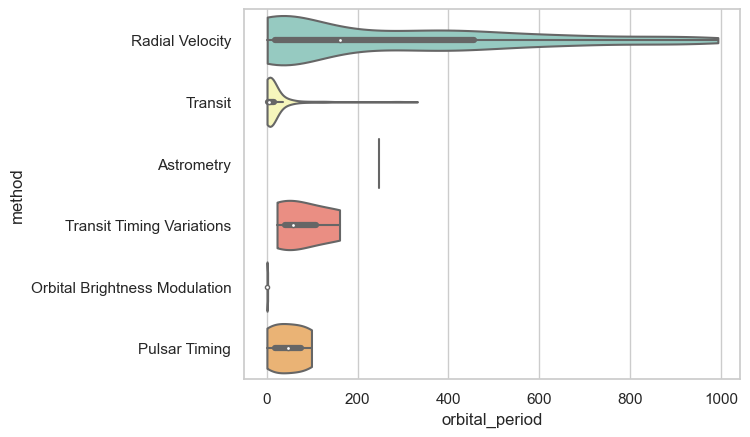

In [52]:
# Don’t let density extend past extreme values in the data:

sns.violinplot(x="orbital_period", y="method",\
                   data=planets_data[planets_data.orbital_period < 1000],\
                  scale="width", palette="Set3",cut =0)

Hmm! That certainly unruffles the *density curve* at the *peak* as well at the *edges*. Let us now try to get this plot segregated based on another variable. As used in previous lectures, we shall once again use **Seaborn factorplot** to achieve this and add `col` parameter for separation:

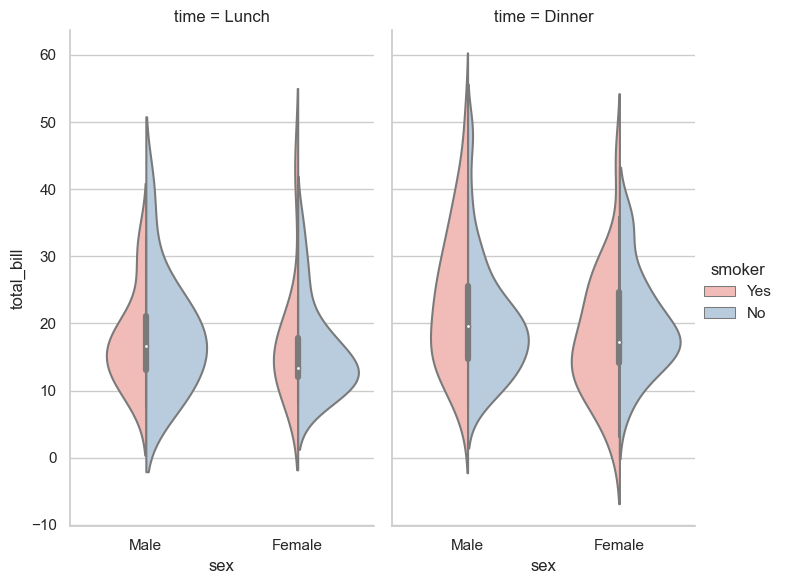

In [53]:
# Load example dataset from Seaborn
tips = sns.load_dataset("tips")

# Using catplot to create a violin plot with splitting and scaling
sns.catplot(x="sex", y="total_bill", hue="smoker", col="time", data=tips,
            palette="Pastel1", kind="violin", split=True, scale="count",
            height=6, aspect=.6)

# Show the plot
plt.show()


Well this spread looks just the way we wanted it to be. Let us now try to segregate the feed within a single plot:

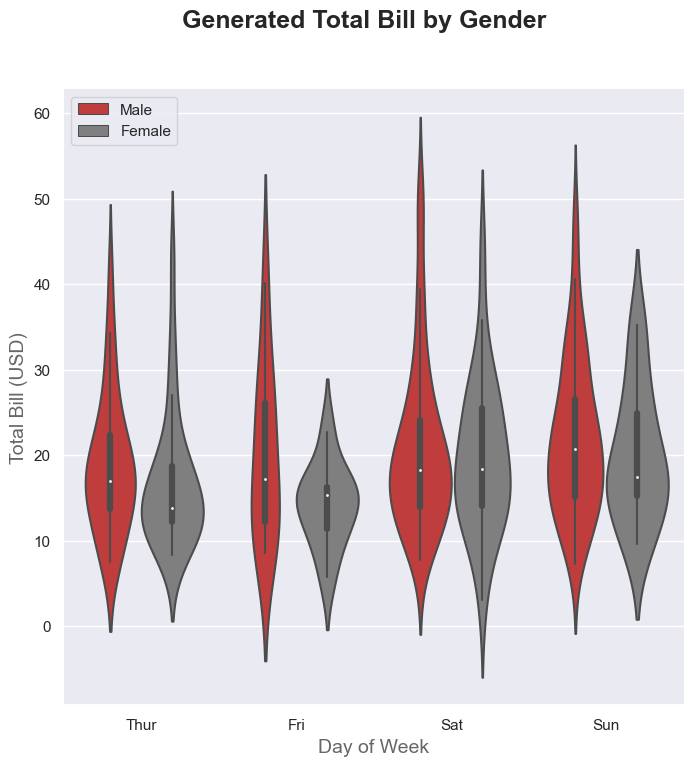

In [54]:
# Modifying Background Style:
sns.set(style="darkgrid")

# Defining size of subplot ('f' represents Figure & 'ax' represents Axes):
f, ax = plt.subplots(figsize=(8, 8))

# Drafting our Seaborn plot with our defined colors:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, palette={"Male": tableau_20[6], "Female": tableau_20[14]})
sns.despine(left=True)

# Using Matplotlib for further customization (Header at Top, X-axis, Y-axis & Legend location on plot):
f.suptitle('Generated Total Bill by Gender', fontsize=18, fontweight='bold')
ax.set_xlabel("Day of Week", size = 14, alpha=0.7)
ax.set_ylabel("Total Bill (USD)", size = 14, alpha=0.7)
plt.legend(loc='upper left')

I could have actually plotted this without so much of Matplotlib customization BUT I wanted to simultaneously give you a glimpse of how *basic Matplotlib plots* work (some of you might be an expert with Matplotlib but am sure it shall help beginners). So I shall quickly run through detailing of the code here: We know that `sns.set()` helps us change the background. Then we have `f` and `ax` which when defined with **Matplotlib Subplot**, allows us to set a **size for the figure** and it's **axes**.

Then we plot a normal **Seaborn Violin plot** as done earlier and with `left=True`, we make all the **spines (or axes) invisible**. Again we use Matplotlib to **add customized headers** at *top*, as well as for both the *axes*; and finally decide the **location** for displaying the **Legend** on the plot.

Let us now try to something more; as in try to add **statistical summary** to **annotate plot** with **number of observations** in our Violin plot using the same Tips dataset:

[Text(0.5, 0, 'Day of Week'), Text(0, 0.5, 'Total Bill (USD)')]

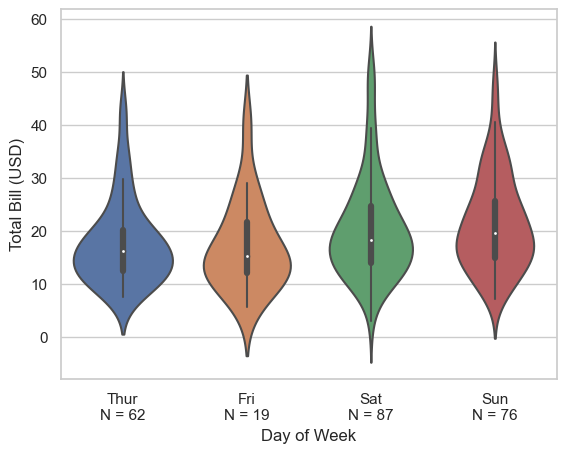

In [55]:
# Modifying background styling:
sns.set_style("whitegrid")

# Heavy use of 'Pandas': Creating temporary functions using Lambda to combine DataFrames for sorting and grouping data
# before I pipeline Violin plot and assign labels:
(sns.load_dataset("tips")
       .assign(count = lambda df: df['day'].map(df.groupby(by=['day'])['total_bill'].count()))
       .assign(grouper = lambda df: df['day'].astype(str) + '\nN = ' + df['count'].astype(str))
       .sort_values(by ='day')
       .pipe((sns.violinplot, 'data'), x="grouper", y="total_bill")
       .set(xlabel='Day of Week', ylabel='Total Bill (USD)'))

If you find it difficult understanding the *usage of Lambda functions* (if not so familiar with Python or Pandas in particular) on *DataFrames*, the let me try to do this the other way around, and whichever looks simpler to you, you may use whenever required:

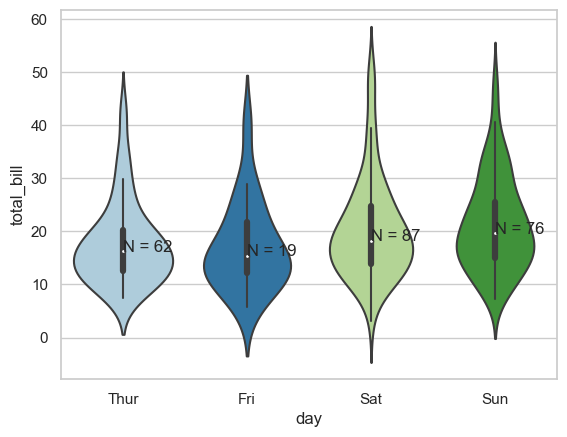

In [56]:
# Assigning a variable to our Violin plot:
ax = sns.violinplot(x="day", y="total_bill", data=tips, palette="Paired")

# Calculating value for 'n':
ylist = tips.groupby(['day'])['total_bill'].median().tolist()
xlist = range(len(ylist))
strlist = ['N = 62','N = 19','N = 87','N = 76']

# Adding calculated value as Text to plot:
for i in range(len(strlist)):
    ax.text(xlist[i], ylist[i], strlist[i])

In both the cases, **N** is just the **Number of observations** on that particular day. In the second plot, I have tried in fact tried to keep the value inside the plot but didn't do the same above. The reason is that there might be scenarios where the summary statistics that you're trying to deduce is so *lengthy with details* that NEITHER would it *look good* inside a plot NOR would it *fit in*, so in those cases, it is preferable to keep them on the axis itself.

Please do remember that Seaborn in itself is just a *Visualization package* and creates compatibility to accept *Statistical packages* under it's hood but for core statistical summary, you will have to call packages like *Statsmodels*. Though monkey hacks are always available here & there.

Now, let us try to combine little *more statistics* BUT graphically on top our Violin plot:

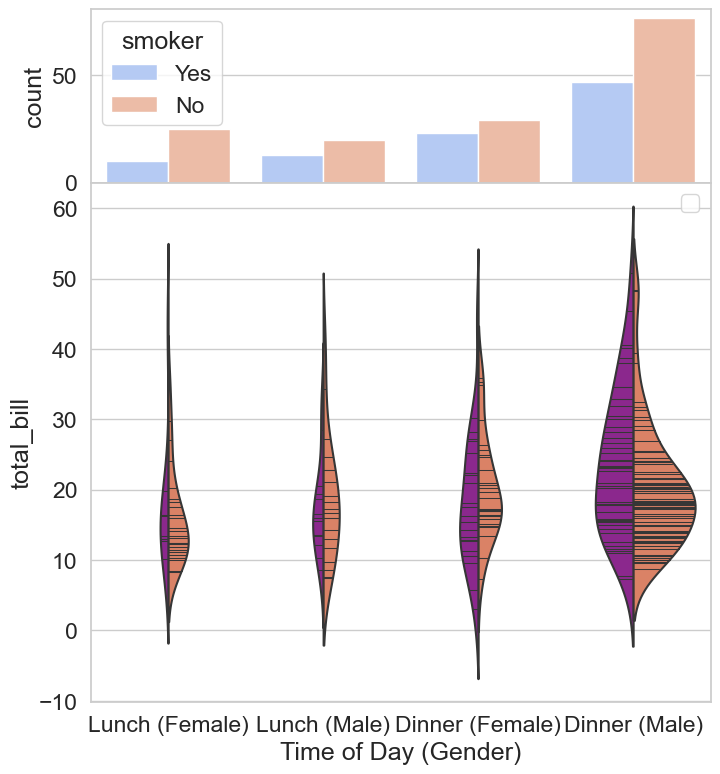

In [57]:
sns.set(style="whitegrid", font_scale=1.5)

# Adding a new column (with any two categorical data we want):
tips["sex_time"] = tips[["sex", "time"]].apply(lambda x: "_".join(x), axis=1)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 9), sharex=True, gridspec_kw=dict(height_ratios=(1, 3), hspace=0))

# Selection of Order for statistical display:
sns.countplot(x="sex_time", hue="smoker", data=tips, palette="coolwarm",
              order= ["Female_Lunch", "Male_Lunch", "Female_Dinner", "Male_Dinner"], ax=axes[0])

sns.violinplot(x="sex_time", y="total_bill", hue="smoker", data=tips, palette="plasma",
               split=True, scale="count", scale_hue=False, inner="stick",
               order= ["Female_Lunch", "Male_Lunch", "Female_Dinner", "Male_Dinner"], ax=axes[1])

axes[1].set_xticklabels(["Lunch (Female)", "Lunch (Male)", "Dinner (Female)", "Dinner (Male)"])
axes[1].set_xlabel("Time of Day (Gender)")
axes[1].legend("")

Here we have been able to successfully merge a **Countplot** on top of a **Violin plot**, thus a pretty decent match of **Count of observations** along with the **Probability Density**. Please note that the limit of customization is endless and I highly encourage you to try. 